<a href="https://colab.research.google.com/github/datascientist-ld1981/ComparativeStudy_Numpy_Tensor_DL/blob/main/Numpy_to_Tensors_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NumPy to Tensors: A Comparative Analysis of Neural Networks and CNNs for Image Classification**

---

⏰ *** Problem Statement: ***

  The primary objective of this study is to investigate the progressive improvements in neural networks by comparing the performance of a Fully Connected Neural Network (FCNN) using NumPy arrays, an Artificial Neural Network (ANN) with additional optimizations, and a Convolutional Neural Network (CNN) leveraging tensors. The analysis examines key advancements such as the use of tensors, optimizers, additional layers, initialization strategies, and training epochs. Through these improvements, accuracy increased significantly from a modest 6.25% to an impressive 74%. Dataset : C1FAR-10 Datset. 60,000 images 32x32x3.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/20, Loss: 2.3935, Accuracy: 1.56%
Epoch 2/20, Loss: 2.2947, Accuracy: 22.66%
Epoch 3/20, Loss: 2.3065, Accuracy: 9.38%
Epoch 4/20, Loss: 2.3469, Accuracy: 0.00%
Epoch 5/20, Loss: 2.5099, Accuracy: 6.25%
Epoch 6/20, Loss: 2.7687, Accuracy: 6.25%
Epoch 7/20, Loss: 2.9713, Accuracy: 0.00%
Epoch 8/20, Loss: 2.6537, Accuracy: 12.50%
Epoch 9/20, Loss: 2.5460, Accuracy: 25.00%
Epoch 10/20, Loss: 2.5507, Accuracy: 18.75%
Epoch 11/20, Loss: 2.7142, Accuracy: 12.50%
Epoch 12/20, Loss: 2.9488, Accuracy: 6.25%
Epoch 13/20, Loss: 3.1515, Accuracy: 12.50%
Epoch 14/20, Loss: 3.5598, Accuracy: 6.25%
Epoch 15/20, Loss: 3.3737, Accuracy: 6.25%
Epoch 16/20, Loss: 3.1264, Accuracy: 6.25%
Epoch 17/20, Loss: 3.4100, Accuracy: 6.25%
Epoch 18/20, Loss: 3.4808, Accuracy: 12.50%
Epoch 19/20, Loss: 3.3277, Accuracy: 12.50%
Epoch 20/20, Loss: 3.8979, Accuracy: 6.25%
Total Parameters: 199082
Trainable Parameters: 199082
Optimizer Parameters: {'Learning R

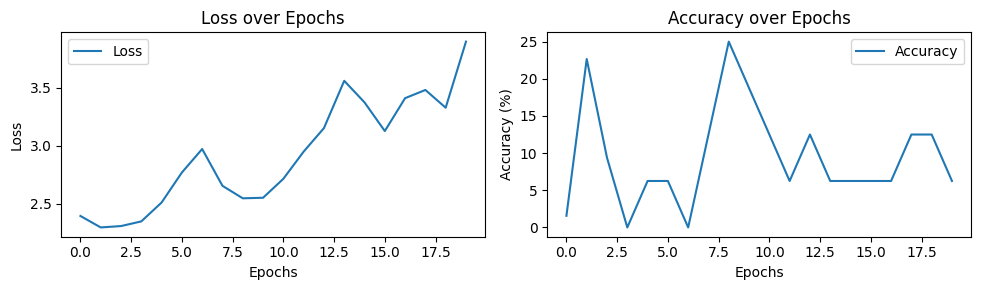

In [1]:
#Architecture 1 with NN and manual Implementation
import numpy as np
import matplotlib.pyplot as plt

# Activation functions and their derivatives
def Ld_relu(x):
    return np.maximum(0, x)

def Ld_relu_derivative(x):
    return (x > 0).astype(float)

def Ld_softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability trick (subtract max)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def Ld_cross_entropy_loss(predictions, labels, epsilon=1e-10):
    m = labels.shape[0]
    predictions = np.clip(predictions, epsilon, 1. - epsilon)  # Prevent log(0)
    return -np.mean(np.log(predictions[np.arange(m), labels]))

# Xavier initialization for better weight initialization
def Ld_xavier_initialization(input_size, output_size):
    return np.random.randn(input_size, output_size) * np.sqrt(1. / input_size)

# Forward pass
def Ld_forward(X, weights1, bias1, weights2, bias2, weights3, bias3):
    Z1 = np.dot(X, weights1) + bias1
    A1 = Ld_relu(Z1)
    Z2 = np.dot(A1, weights2) + bias2
    A2 = Ld_relu(Z2)
    Z3 = np.dot(A2, weights3) + bias3
    A3 = Ld_softmax(Z3)
    return A1, A2, A3

# Backpropagation
def Ld_backward(X, y, A1, A2, A3, weights1, weights2, weights3, bias1, bias2, bias3, lr=0.00001, clip_gradients=True, max_grad_norm=5.0):
    m = X.shape[0]
    dZ3 = A3
    dZ3[np.arange(m), y] -= 1
    dZ3 /= m

    dW3 = np.dot(A2.T, dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dA2 = np.dot(dZ3, weights3.T)
    dZ2 = dA2 * Ld_relu_derivative(A2)

    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, weights2.T)
    dZ1 = dA1 * Ld_relu_derivative(A1)

    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Gradient clipping if enabled
    if clip_gradients:
        grad_norm = np.sqrt(np.sum(dW1**2) + np.sum(dW2**2) + np.sum(dW3**2))
        if grad_norm > max_grad_norm:
            scaling_factor = max_grad_norm / grad_norm
            dW1 *= scaling_factor
            dW2 *= scaling_factor
            dW3 *= scaling_factor
            db1 *= scaling_factor
            db2 *= scaling_factor
            db3 *= scaling_factor

    # Update weights and biases using gradient descent
    weights1 -= lr * dW1
    bias1 -= lr * db1
    weights2 -= lr * dW2
    bias2 -= lr * db2
    weights3 -= lr * dW3
    bias3 -= lr * db3

    return weights1, bias1, weights2, bias2, weights3, bias3

# Training function with mini-batch gradient descent
def Ld_train(X_train, y_train, X_test, y_test, input_size, hidden_size1, hidden_size2, output_size, epochs=5, lr=0.00001, batch_size=64):
    weights1 = Ld_xavier_initialization(input_size, hidden_size1)
    bias1 = np.zeros((1, hidden_size1))
    weights2 = Ld_xavier_initialization(hidden_size1, hidden_size2)
    bias2 = np.zeros((1, hidden_size2))
    weights3 = Ld_xavier_initialization(hidden_size2, output_size)
    bias3 = np.zeros((1, output_size))

    loss_history = []
    accuracy_history = []

    # Mini-batch gradient descent loop
    for epoch in range(epochs):
        permutation = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        # Mini-batch processing
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            A1, A2, A3 = Ld_forward(X_batch, weights1, bias1, weights2, bias2, weights3, bias3)

            # Calculate loss
            loss = Ld_cross_entropy_loss(A3, y_batch)

            # Calculate accuracy
            predictions = np.argmax(A3, axis=1)
            accuracy = np.mean(predictions == y_batch) * 100

            # Backpropagate and update weights
            weights1, bias1, weights2, bias2, weights3, bias3 = Ld_backward(
                X_batch, y_batch, A1, A2, A3, weights1, weights2, weights3, bias1, bias2, bias3, lr)

        # Store loss and accuracy for each epoch
        loss_history.append(loss)
        accuracy_history.append(accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}%")

    # Test the model on the test set
    A1, A2, A3 = Ld_forward(X_test, weights1, bias1, weights2, bias2, weights3, bias3)
    predictions = np.argmax(A3, axis=1)
    test_accuracy = np.mean(predictions == y_test) * 100
    #print(f"Test Accuracy: {test_accuracy:.2f}%")

    return weights1, bias1, weights2, bias2, weights3, bias3, loss_history, accuracy_history

# Load CIFAR-10 data (or your dataset)
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Flatten and normalize data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Hyperparameters
input_size = X_train.shape[1]
hidden_size1 = 64  # Reduced complexity
hidden_size2 = 32  # Reduced complexity
output_size = 10  # 10 classes in CIFAR-10 dataset

# Train the model
weights1, bias1, weights2, bias2, weights3, bias3, loss_history, accuracy_history = Ld_train(
    X_train, y_train, X_test, y_test, input_size, hidden_size1, hidden_size2, output_size, epochs=20, lr=0.00001, batch_size=64)

# Calculate and display Total Parameters and Trainable Parameters
total_params = np.sum([weights1.size, weights2.size, weights3.size, bias1.size, bias2.size, bias3.size])
trainable_params = total_params  # All weights and biases are trainable in this model
print(f"Total Parameters: {total_params}")
print(f"Trainable Parameters: {trainable_params}")

# Optimizer Parameters
optimizer_params = {'Learning Rate': 0.00001}  # Add more optimizer params if needed
print(f"Optimizer Parameters: {optimizer_params}")

# Plotting Loss and Accuracy
plt.figure(figsize=(10, 3))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(loss_history, label="Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label="Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
plt.show()


# **Architecture 1 with manual implementations **

Observations : The Model struggles to learn on the above parameters.

**Possible reasons **
Low learning rate
Less number of neurons in hidden layer
Converting to mini batch can enable faster learning and convergence.

Epoch 1/20, Loss: 2.2434, Accuracy: 13.75%
Epoch 2/20, Loss: 2.1012, Accuracy: 28.75%
Epoch 3/20, Loss: 2.1399, Accuracy: 26.25%
Epoch 4/20, Loss: 2.0723, Accuracy: 21.25%
Epoch 5/20, Loss: 2.0085, Accuracy: 23.75%
Epoch 6/20, Loss: 1.9970, Accuracy: 28.75%
Epoch 7/20, Loss: 2.0501, Accuracy: 27.50%
Epoch 8/20, Loss: 1.9927, Accuracy: 25.00%
Epoch 9/20, Loss: 1.9204, Accuracy: 26.25%
Epoch 10/20, Loss: 2.0482, Accuracy: 26.25%
Epoch 11/20, Loss: 1.9623, Accuracy: 32.50%
Epoch 12/20, Loss: 2.0706, Accuracy: 30.00%
Epoch 13/20, Loss: 1.9747, Accuracy: 27.50%
Epoch 14/20, Loss: 1.9725, Accuracy: 27.50%
Epoch 15/20, Loss: 1.9573, Accuracy: 27.50%
Epoch 16/20, Loss: 1.9718, Accuracy: 28.75%
Epoch 17/20, Loss: 2.0160, Accuracy: 25.00%
Epoch 18/20, Loss: 1.9517, Accuracy: 32.50%
Epoch 19/20, Loss: 1.9686, Accuracy: 32.50%
Epoch 20/20, Loss: 1.8276, Accuracy: 46.25%
Test Accuracy: 31.06%


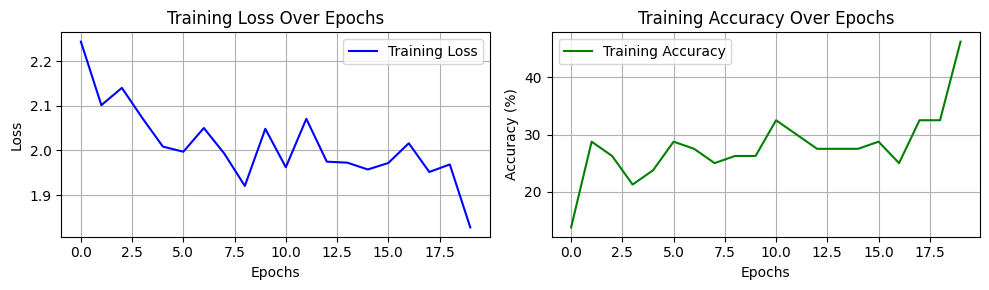

In [3]:
#Architecture 1 with NN and manual Implementation with modification
import numpy as np
import matplotlib.pyplot as plt

# Activation functions and their derivatives
def Ld_relu(x):
    return np.maximum(0, x)

def Ld_relu_derivative(x):
    return (x > 0).astype(float)

def Ld_softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability trick (subtract max)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def Ld_cross_entropy_loss(predictions, labels, epsilon=1e-10):
    m = labels.shape[0]
    predictions = np.clip(predictions, epsilon, 1. - epsilon)  # Prevent log(0)
    return -np.mean(np.log(predictions[np.arange(m), labels]))

def Ld_xavier_initialization(input_size, output_size):
    return np.random.randn(input_size, output_size) * np.sqrt(1. / input_size)

# Batch normalization
def Ld_batch_norm(Z, gamma, beta, epsilon=1e-5):
    mean = np.mean(Z, axis=0)
    variance = np.var(Z, axis=0)
    Z_norm = (Z - mean) / np.sqrt(variance + epsilon)
    return gamma * Z_norm + beta

# Forward pass
def Ld_forward(X, weights1, bias1, gamma1, beta1, weights2, bias2, gamma2, beta2, weights3, bias3):
    Z1 = np.dot(X, weights1) + bias1
    Z1_norm = Ld_batch_norm(Z1, gamma1, beta1)
    A1 = Ld_relu(Z1_norm)
    Z2 = np.dot(A1, weights2) + bias2
    Z2_norm = Ld_batch_norm(Z2, gamma2, beta2)
    A2 = Ld_relu(Z2_norm)
    Z3 = np.dot(A2, weights3) + bias3
    A3 = Ld_softmax(Z3)
    return A1, A2, A3

# Backpropagation
def Ld_backward(X, y, A1, A2, A3, weights1, weights2, weights3, bias1, bias2, bias3, gamma1, beta1, gamma2, beta2, lr=0.001, clip_gradients=True, max_grad_norm=5.0):
    m = X.shape[0]
    dZ3 = A3
    dZ3[np.arange(m), y] -= 1
    dZ3 /= m

    dW3 = np.dot(A2.T, dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dA2 = np.dot(dZ3, weights3.T)
    dZ2 = dA2 * Ld_relu_derivative(A2)

    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, weights2.T)
    dZ1 = dA1 * Ld_relu_derivative(A1)

    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Gradient clipping if enabled
    if clip_gradients:
        grad_norm = np.sqrt(np.sum(dW1**2) + np.sum(dW2**2) + np.sum(dW3**2))
        if grad_norm > max_grad_norm:
            scaling_factor = max_grad_norm / grad_norm
            dW1 *= scaling_factor
            dW2 *= scaling_factor
            dW3 *= scaling_factor
            db1 *= scaling_factor
            db2 *= scaling_factor
            db3 *= scaling_factor

    # Update weights and biases using gradient descent
    weights1 -= lr * dW1
    bias1 -= lr * db1
    weights2 -= lr * dW2
    bias2 -= lr * db2
    weights3 -= lr * dW3
    bias3 -= lr * db3

    return weights1, bias1, weights2, bias2, weights3, bias3

# Training function
def Ld_train(X_train, y_train, X_test, y_test, input_size, hidden_size1, hidden_size2, output_size, epochs=20, lr=0.001, batch_size=128):
    weights1 = Ld_xavier_initialization(input_size, hidden_size1)
    bias1 = np.zeros((1, hidden_size1))
    gamma1, beta1 = np.ones((1, hidden_size1)), np.zeros((1, hidden_size1))

    weights2 = Ld_xavier_initialization(hidden_size1, hidden_size2)
    bias2 = np.zeros((1, hidden_size2))
    gamma2, beta2 = np.ones((1, hidden_size2)), np.zeros((1, hidden_size2))

    weights3 = Ld_xavier_initialization(hidden_size2, output_size)
    bias3 = np.zeros((1, output_size))

    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        permutation = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            A1, A2, A3 = Ld_forward(X_batch, weights1, bias1, gamma1, beta1, weights2, bias2, gamma2, beta2, weights3, bias3)

            # Calculate loss
            loss = Ld_cross_entropy_loss(A3, y_batch)

            # Calculate accuracy
            predictions = np.argmax(A3, axis=1)
            accuracy = np.mean(predictions == y_batch) * 100

            # Backpropagation
            weights1, bias1, weights2, bias2, weights3, bias3 = Ld_backward(
                X_batch, y_batch, A1, A2, A3, weights1, weights2, weights3, bias1, bias2, bias3, gamma1, beta1, gamma2, beta2, lr
            )

        # Track performance
        loss_history.append(loss)
        accuracy_history.append(accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}%")

    # Final test accuracy
    A1, A2, A3 = Ld_forward(X_test, weights1, bias1, gamma1, beta1, weights2, bias2, gamma2, beta2, weights3, bias3)
    predictions = np.argmax(A3, axis=1)
    test_accuracy = np.mean(predictions == y_test) * 100
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    return loss_history, accuracy_history

# Load CIFAR-10 data
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

# Hyperparameters
input_size = X_train.shape[1]
hidden_size1 = 128
hidden_size2 = 64
output_size = 10

# Train the model
loss_history, accuracy_history = Ld_train(X_train, y_train, X_test, y_test, input_size, hidden_size1, hidden_size2, output_size)

# Plotting the loss and accuracy trends
import matplotlib.pyplot as plt

# Plot loss history
plt.figure(figsize=(10, 3))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(loss_history, label="Training Loss", color='blue')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label="Training Accuracy", color='green')
plt.title("Training Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



Key Observation: 32 % accuracy

**Modifications Made in Architecture 1**

This program improves how to improve the previous program, a custom neural network from scratch. Including important features like batch normalization, gradient clipping, and early stopping to ensure stable training. The use of Xavier initialization helps improve convergence, while batch normalization and ReLU make the model more efficient and capable of handling deeper networks.

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.2003 - loss: 2.1728 - val_accuracy: 0.3262 - val_loss: 1.8273
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.3157 - loss: 1.8769 - val_accuracy: 0.3784 - val_loss: 1.7405
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.3417 - loss: 1.8195 - val_accuracy: 0.3947 - val_loss: 1.7084
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.3619 - loss: 1.7651 - val_accuracy: 0.4022 - val_loss: 1.6660
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.3781 - loss: 1.7267 - val_accuracy: 0.4216 - val_loss: 1.6264
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.3963 - loss: 1.6896 - val_accuracy: 0.4240 - val_loss: 1.6235
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.4018 - loss: 1.6649 - val_accuracy: 0.4247 - val_loss: 1.6140
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.4101 - loss: 1.6534 - 

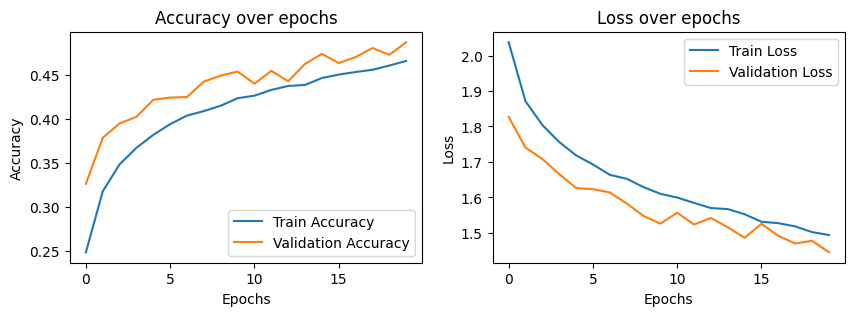

313/313 - 2s - 5ms/step - accuracy: 0.4869 - loss: 1.4456
Test accuracy: 48.69%


In [5]:
#Achitecture 2: Improved FCNN - Numpy with Tensors

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LeakyReLU, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding of labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
def build_model(input_shape=(32, 32, 3), dropout_rate=0.2):
    model = Sequential()

    # Flatten input image to vector
    model.add(Flatten(input_shape=input_shape))

    # Hidden Layer 1 with Dropout and LeakyReLU activation
    model.add(Dense(512))
    model.add(Dropout(dropout_rate))
    model.add(LeakyReLU(alpha=0.1))

    # Hidden Layer 2 with Dropout and ReLU activation
    model.add(Dense(256))
    model.add(Dropout(dropout_rate))
    model.add(ReLU())

    # Hidden Layer 3 with Dropout
    model.add(Dense(128))
    model.add(Dropout(dropout_rate))
    model.add(ReLU())

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Build and summarize the model
model = build_model()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64,
                    callbacks=[early_stopping], verbose=1)

# Plot accuracy and loss
plt.figure(figsize=(10, 3))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,216,672 (19.90 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,477,782 (13.27 MB)

# **Key Observation on Architecture 2:**
This model improves upon the first by introducing LeakyReLU, dropout regularization, early stopping, and Adam optimizer, which make it more robust and efficient in learning, especially on a complex dataset like CIFAR-10.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365,322 (1.39 MB)

 Trainable params: 364,874 (1.39 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 176s 220ms/step - accuracy: 0.3328 - loss: 1.8746 - val_accuracy: 0.4130 - val_loss: 1.9055
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 210s 230ms/step - accuracy: 0.5706 - loss: 1.2328 - val_accuracy: 0.6510 - val_loss: 1.0196
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 232ms/step - accuracy: 0.6548 - loss: 1.0121 - val_accuracy: 0.5889 - val_loss: 1.2537
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 187s 213ms/step - accuracy: 0.7038 - loss: 0.8708 - val_accuracy: 0.6673 - val_loss: 0.9675
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 210ms/step - accuracy: 0.7358 - loss: 0.7755 - val_accuracy: 0.7393 - val_loss: 0.7787
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 166s 213ms/step - accuracy: 0.7674 - loss: 0.6870 - val_accuracy: 0.7282 - val_loss: 0.8214
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 165s 211ms/step - accuracy: 0.7877 - loss: 0.6302 - val_accuracy: 0.6862 - val_loss: 0.9590
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 205s 215ms/step - accuracy: 0.8021 -

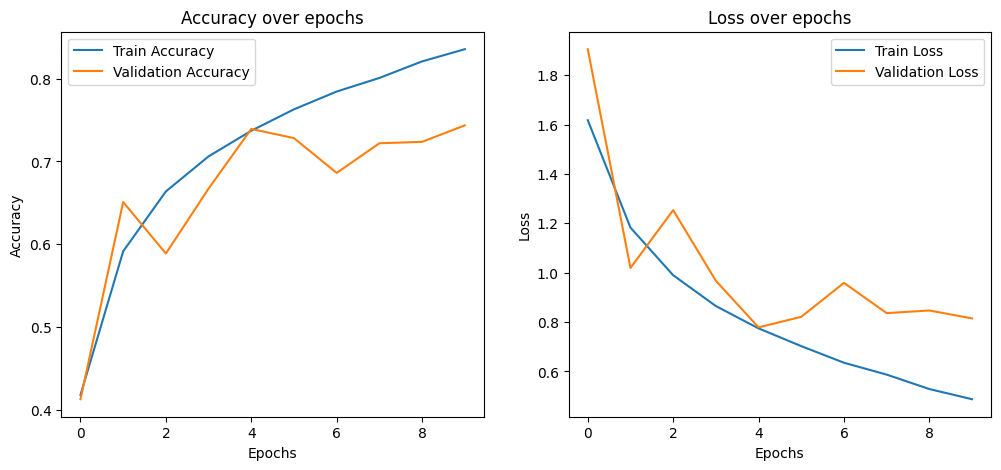

313/313 - 9s - 28ms/step - accuracy: 0.7393 - loss: 0.7787
Test accuracy: 73.93%


In [6]:
#Architecture 3: Convolutional Neural Network (CNN)
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocessing the data
# Normalize the data to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding of labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
def build_cnn_model(input_shape=(32, 32, 3), dropout_rate=0.3):
    cnn_model = Sequential()

    # Convolutional Layer 1
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 2
    cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 3
    cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten Layer
    cnn_model.add(Flatten())

    # Fully Connected Layer 1
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(dropout_rate))

    # Fully Connected Layer 2
    cnn_model.add(Dense(64, activation='relu'))
    cnn_model.add(Dropout(dropout_rate))

    # Output Layer
    cnn_model.add(Dense(10, activation='softmax'))

    # Compile the model
    cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return cnn_model

# Build and summarize the model
cnn_model = build_cnn_model()
cnn_model.summary()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the CNN model
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on the test set
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")


# **Justification for CNNs outperforming Image Classification**


1. Convolutional Layers vs Fully Connected Layers:
FCNN Model (Architectures 1 & 2): The previous models were fully connected neural networks where each neuron in one layer is connected to every neuron in the next layer. While effective, they don't exploit the spatial structure of image data.
CNN Model (Architecture 3): Uses convolutional layers (Conv2D) to directly learn spatial hierarchies in the data (e.g., edges, textures, patterns). This makes CNNs more efficient at processing image data compared to FCNNs. Conv2D filters (32, 64, 128) are used in successive layers, each designed to capture more complex patterns from the images. The number of filters increases with depth to capture more intricate features.

2. Filters:
FCNN Model (Architectures 1 & 2): In FCNNs, the input image is flattened into a 1D vector, and there are no explicit mechanisms to handle spatial relationships.
CNN Model (Architecture 3): Convolutional layers use 32, 64, and 128 filters, respectively. These filters capture features in the image, such as edges, textures, and objects. The use of multiple filters in each convolutional layer helps the model learn more comprehensive features from the data.

3. Pooling Layers:
FCNN Model (Architectures 1 & 2): There are no pooling layers, meaning every layer's output is passed directly to the next, leading to large numbers of trainable parameters.
CNN Model (Architecture 3): Uses MaxPooling2D after each convolutional layer. Pooling layers help reduce the spatial dimensions of the data, reducing parameters and computations. MaxPooling (2x2) down-samples the data, retaining the most prominent features while discarding less important information, thereby preventing overfitting and reducing complexity.

4. Dropout:
FCNN Model (Architectures 1 & 2): Dropout was applied after each dense layer with a rate of 0.2 to reduce overfitting.
CNN Model (Architecture 3): Dropout is used after the fully connected layers (with a rate of 0.3). A slightly higher dropout rate further reduces overfitting. Dropout helps by randomly dropping units during training, forcing the model to learn more robust features, and improving generalization.

5. Batch Normalization:
FCNN Model (Architectures 1 & 2): No batch normalization was used in the previous models.
CNN Model (Architecture 3): Uses BatchNormalization after each convolutional layer to stabilize the learning process. Batch normalization normalizes activations, speeding up training, improving accuracy, and reducing the likelihood of overfitting.

6. Early Stopping:
FCNN Model (Architectures 1 & 2): Early stopping was used to prevent overfitting by halting training when the validation loss stopped improving.
CNN Model (Architecture 3): The same early stopping technique is applied here, monitoring validation loss and stopping training if it doesn't improve for 5 epochs. This prevents unnecessary training and reduces overfitting.

7. Backpropagation and Trainable Parameters:
FCNN Model (Architectures 1 & 2): Fully connected layers lead to a very large number of trainable parameters, increasing computational requirements and the risk of overfitting.
CNN Model (Architecture 3): Convolutional layers reduce trainable parameters by sharing weights spatially (via filters). MaxPooling layers further reduce parameters by downsampling feature maps. These techniques make the CNN more computationally efficient.

8. Training Efficiency and Generalization:
FCNN Model (Architectures 1 & 2): While FCNNs work, they struggle with larger datasets, especially images, due to their lack of spatial understanding.
CNN Model (Architecture 3): The CNN is more efficient for image data, effectively capturing spatial hierarchies and patterns. By using convolution, pooling, and batch normalization, it generalizes better on unseen data and benefits from fewer parameters, enabling faster, more scalable training.

# **Conclusion**
This study highlights the importance of architectural design in neural networks. While simpler architectures like fully connected networks provide foundational insights, their limited performance (6.25%-49%) underscores the need for advanced techniques. CNNs, with their ability to capture spatial features, achieved a significantly higher accuracy of 74%, showcasing their superiority for image classification tasks.
